In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [ ]:
print(X);

      Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0              0           1           6          15          12           1   
1              0           0          10          16           6           0   
2              0           0           8          15          16          13   
3              0           0           0           3          11          16   
4              0           0           5          14           4           0   
...          ...         ...         ...         ...         ...         ...   
5615           0           0           4          10          13           6   
5616           0           0           6          16          13          11   
5617           0           0           1          11          15           1   
5618           0           0           2          10           7           0   
5619           0           0          10          14           8           1   

      Attribute7  Attribute8  Attribute

In [ ]:
print(y)

      class
0         0
1         0
2         7
3         4
4         6
...     ...
5615      9
5616      0
5617      8
5618      9
5619      8

[5620 rows x 1 columns]


In [3]:
import seaborn as sms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier;
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [16]:
def solvesvc(kernelvalue,testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  classifier = SVC(kernel = kernelvalue, random_state = 0,probability=True)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Test size 20


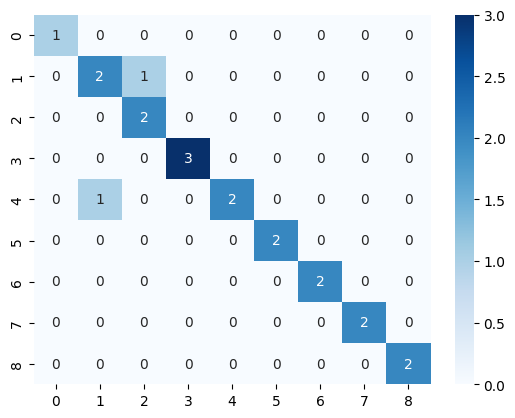

accuracy_score 0.9
precision_score 0.9259259259259258
recall_score 0.9259259259259258
f1_score 0.9185185185185184


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


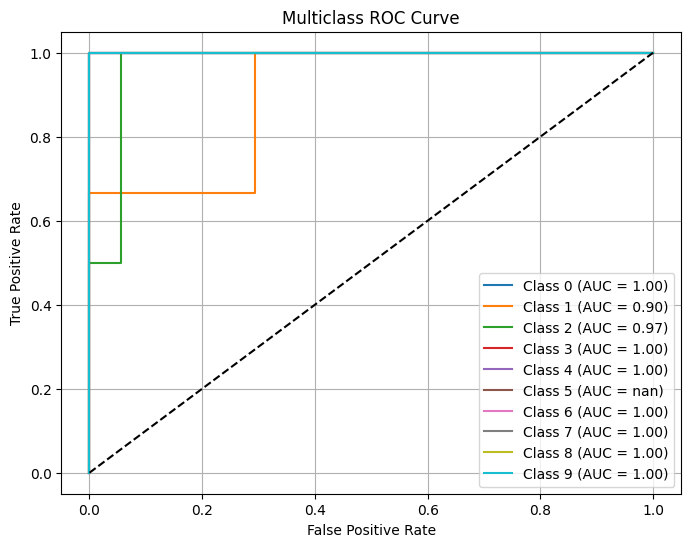

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Test size 30


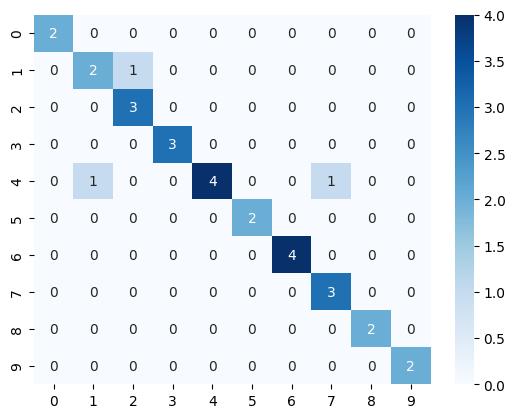

accuracy_score 0.9
precision_score 0.9166666666666666
recall_score 0.9333333333333332
f1_score 0.9180952380952381


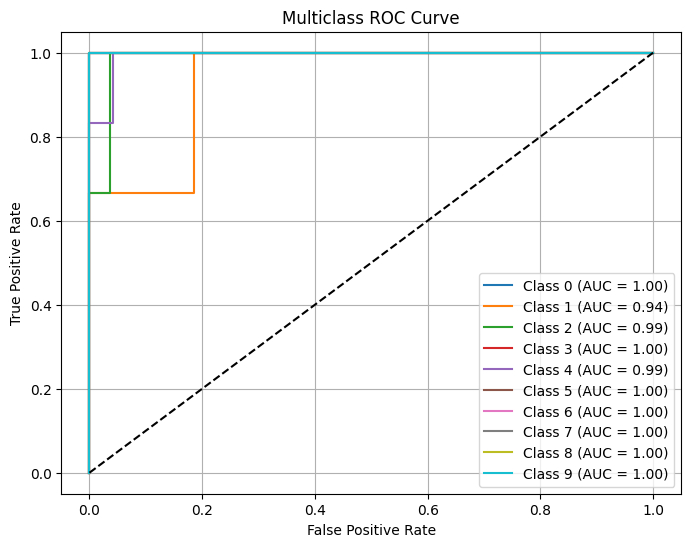

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Test size 40


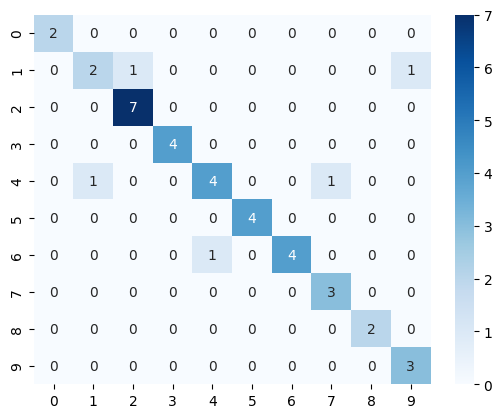

accuracy_score 0.875
precision_score 0.8841666666666667
recall_score 0.8966666666666667
f1_score 0.8835209235209236


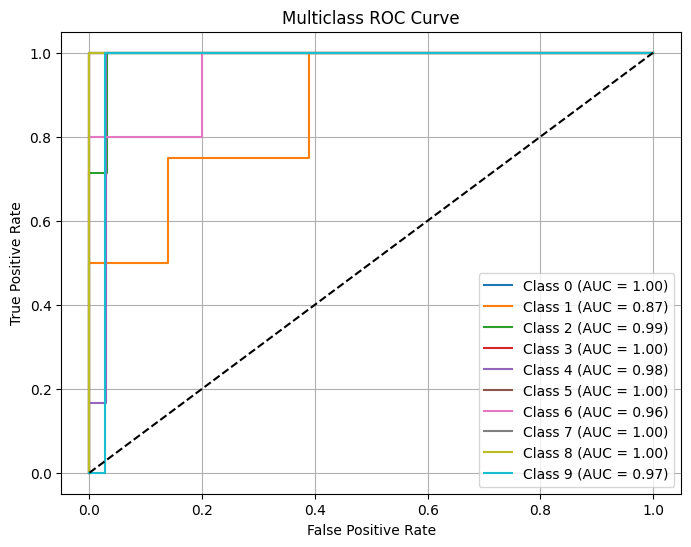

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Test size 50


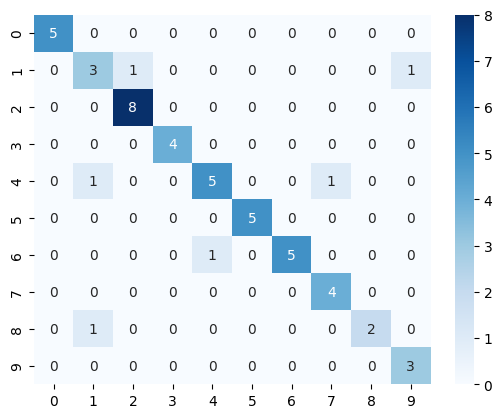

accuracy_score 0.88
precision_score 0.8872222222222224
recall_score 0.8814285714285715
f1_score 0.8765529894941659


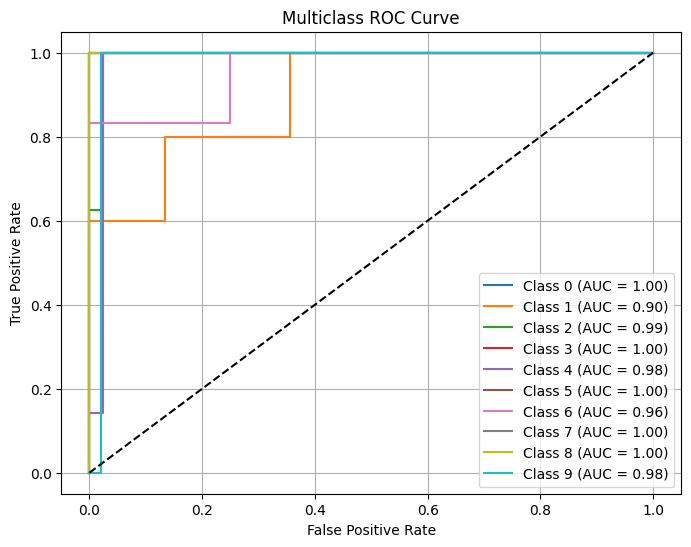

Text(0, 0.5, 'accuracy_score')

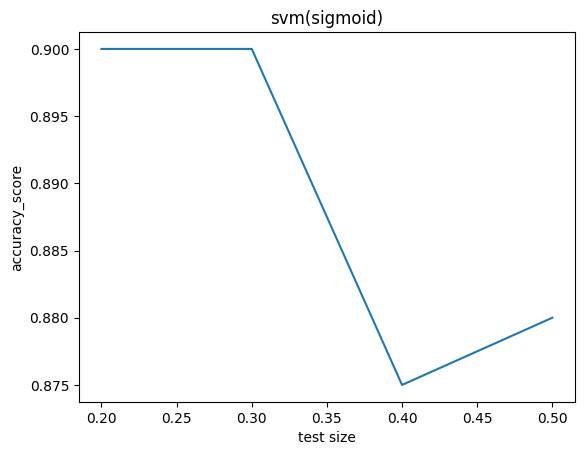

In [17]:
testsize=[];
acc_score=[];
for i in range (2,6):
  solvesvc('sigmoid',i*10,X,y,testsize,acc_score)#put kernelvalue=poly,rbf,linear,sigmoid rbf and linear for test size=20 and 30 = overfitting
plt.plot(testsize,acc_score);
plt.title('svm(sigmoid)');
plt.xlabel('test size');
plt.ylabel('accuracy_score')

In [11]:
def solvesvcpca(kernelvalue,testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  pca = PCA(n_components = 2)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  classifier = SVC(kernel = kernelvalue, random_state = 0, probability=True)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid();
  plt.show();

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Test size 20


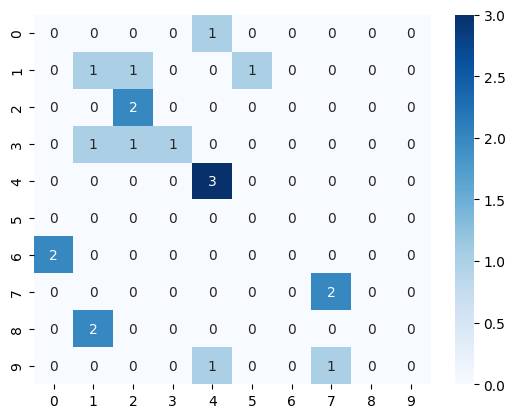

accuracy_score 0.45
precision_score 0.30166666666666664
recall_score 0.36666666666666664
f1_score 0.30023809523809525


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


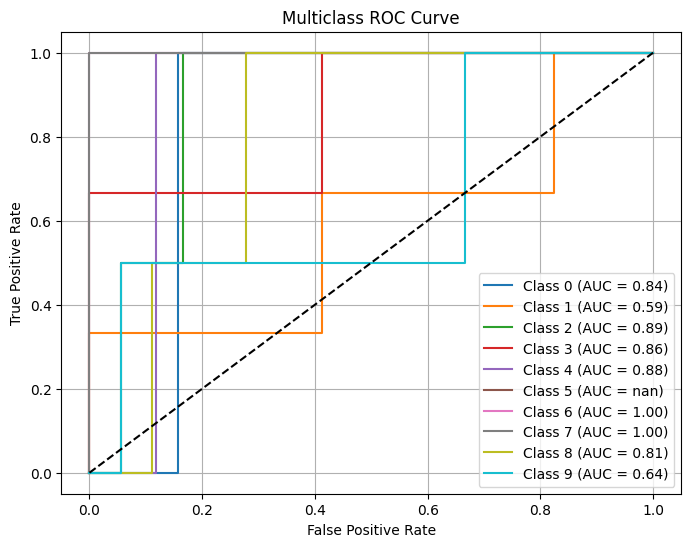

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Test size 30


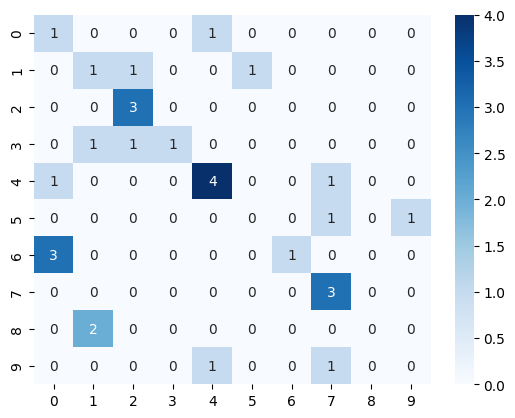

accuracy_score 0.4666666666666667
precision_score 0.4216666666666667
recall_score 0.4083333333333333
f1_score 0.35547619047619045


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


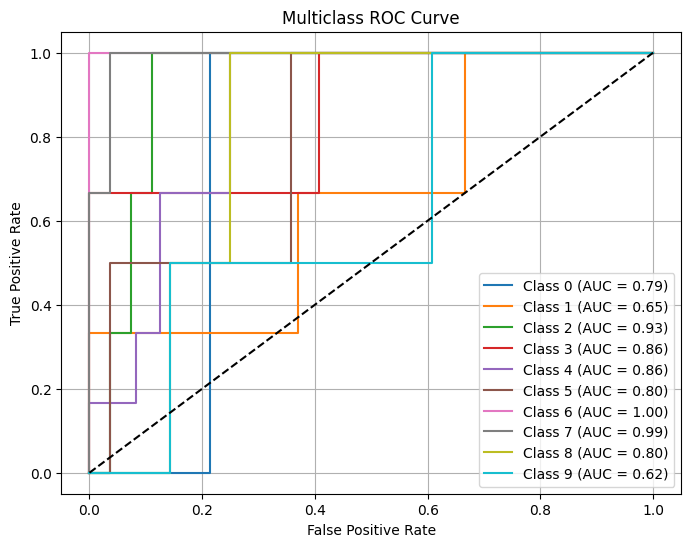

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Test size 40


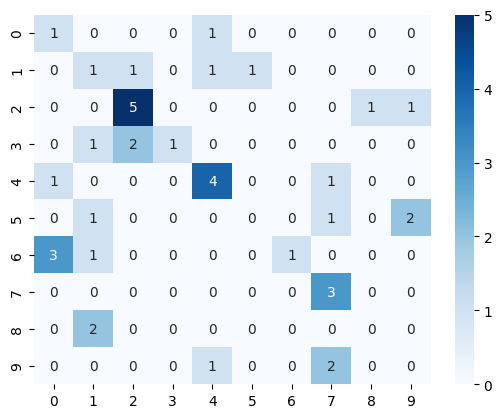

accuracy_score 0.4
precision_score 0.39916666666666667
recall_score 0.35809523809523813
f1_score 0.3101098901098901


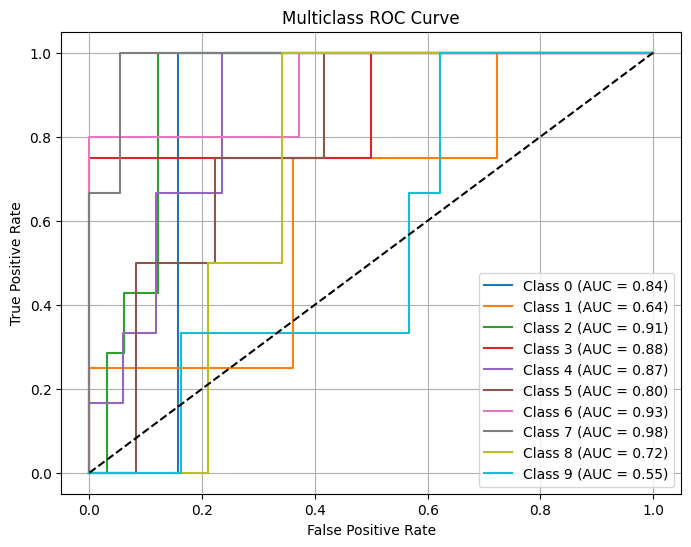

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Test size 50


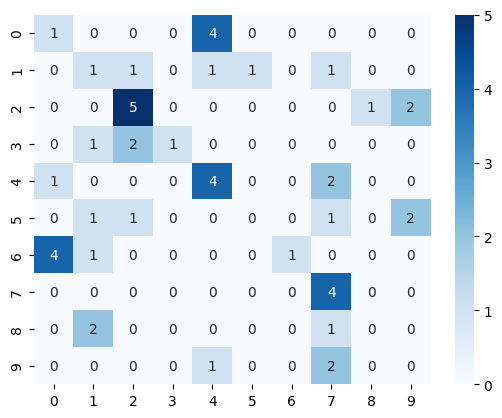

accuracy_score 0.34
precision_score 0.3652525252525253
recall_score 0.3013095238095238
f1_score 0.26415075120957476


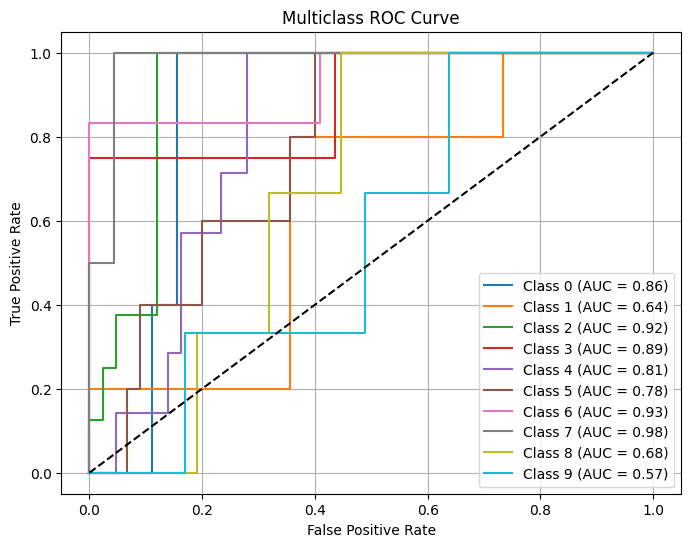

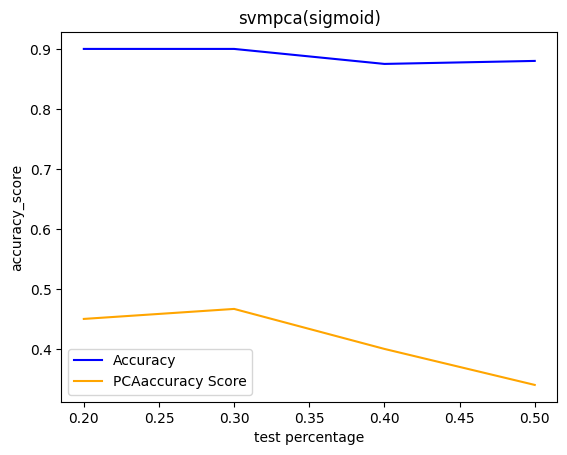

In [18]:
testsize=[];
arr_score=[];
for i in range (2,6):
  solvesvcpca('sigmoid',i*10,X,y,testsize,arr_score)#put kernelvalue=poly,rbf,linear,sigmoid

plt.plot(testsize, acc_score, label="Accuracy", color="blue")
plt.plot(testsize, arr_score, label="PCAaccuracy Score", color="orange")
plt.title('svmpca(sigmoid)');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');
plt.legend()

In [ ]:
def solverandomforest(testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0);
  classifier.fit(X_train,y_train)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




Test size 20


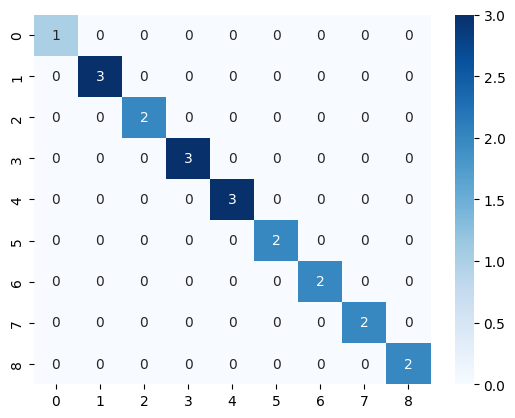

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


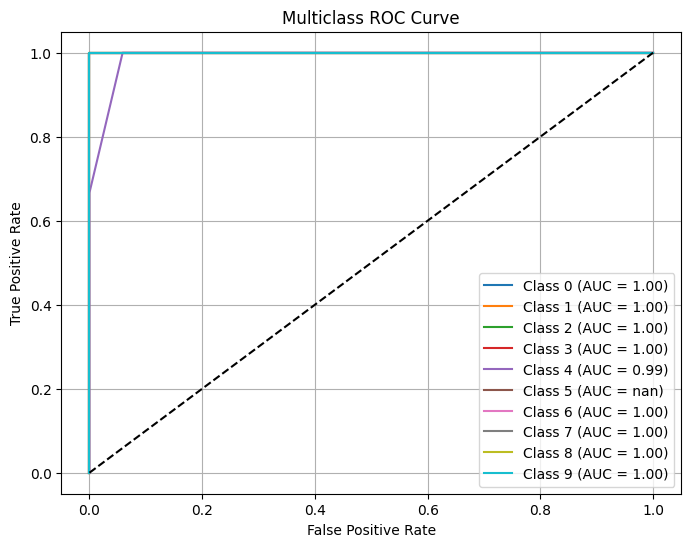

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




Test size 30


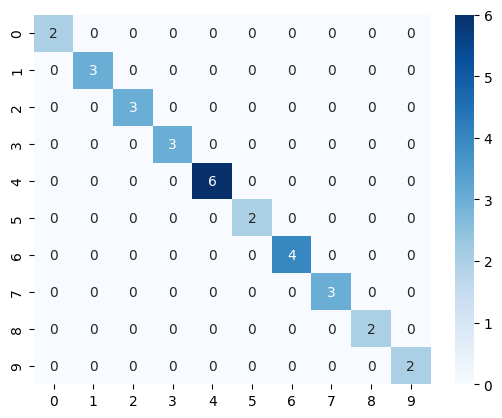

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


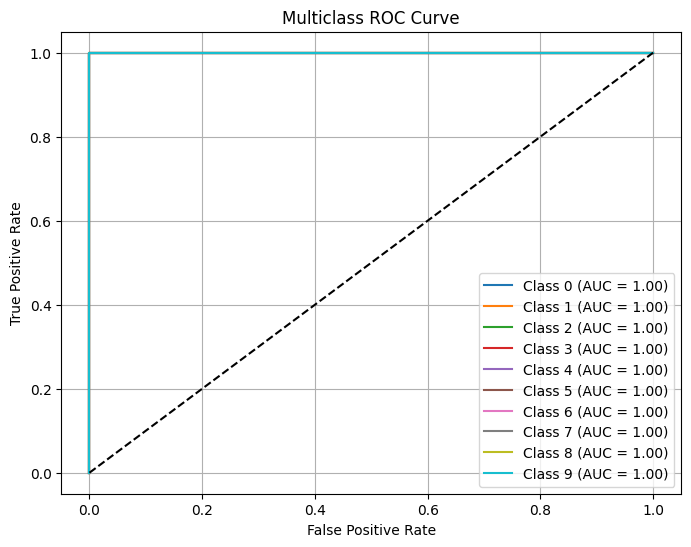

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




Test size 40


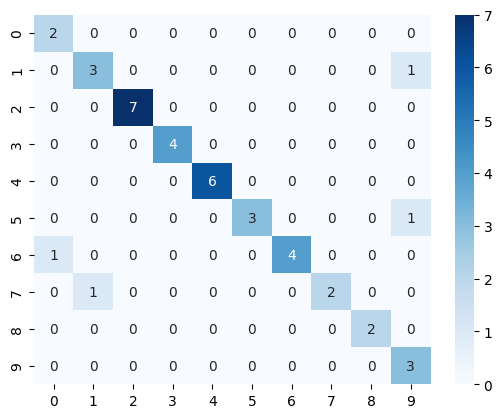

accuracy_score 0.9
precision_score 0.9016666666666666
recall_score 0.8966666666666667
f1_score 0.8846031746031745


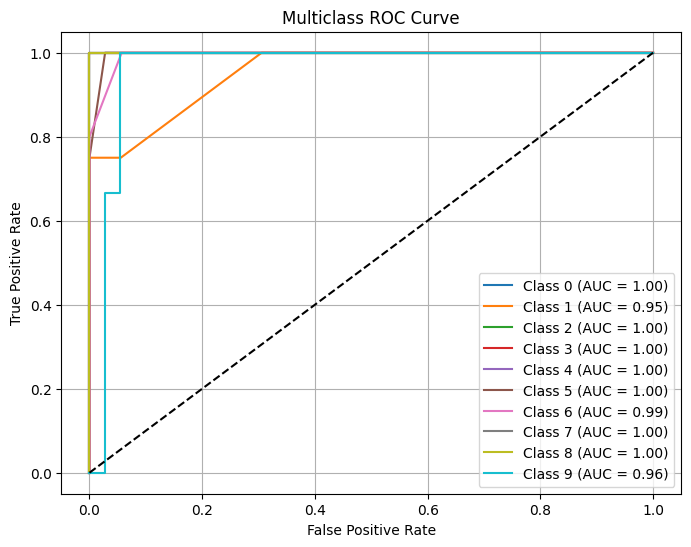

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




Test size 50


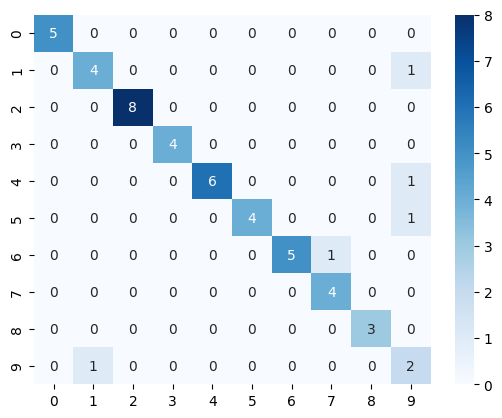

accuracy_score 0.9
precision_score 0.9
recall_score 0.8957142857142857
f1_score 0.8909945609945609


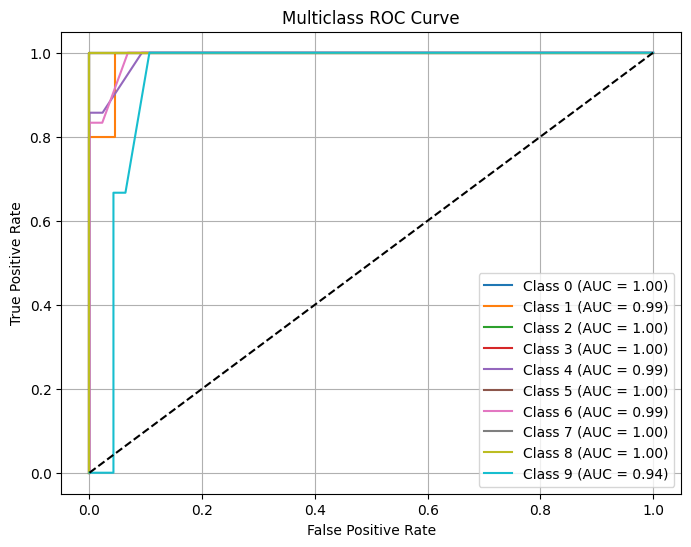

Text(0, 0.5, 'accuracy_score')

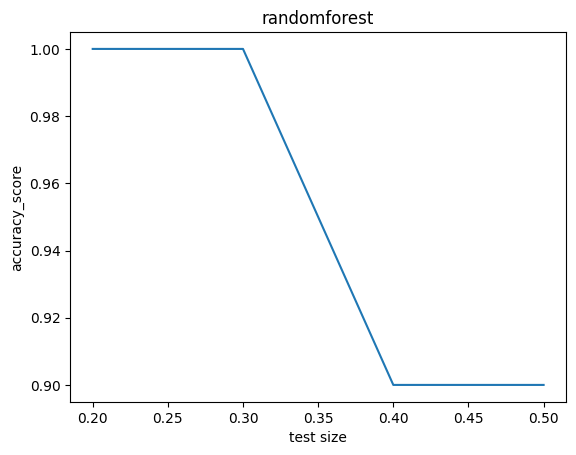

In [ ]:
testsize=[];
acc_score=[];
for i in range (2,6):# randomforest overfitting for tsize=20 and 30
  solverandomforest(i*10,X,y,testsize,acc_score)#criterion=entropy
plt.plot(testsize,acc_score);
plt.title('randomforest');
plt.xlabel('test size');
plt.ylabel('accuracy_score')


In [ ]:
def solverandomforestpca(testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  pca = PCA(n_components = 2)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0);
  classifier.fit(X_train,y_train)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




Test size 20


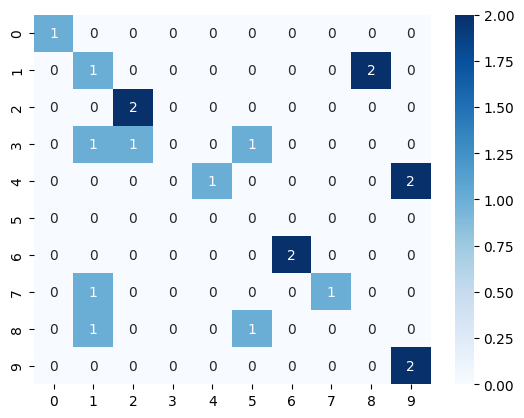

accuracy_score 0.5
precision_score 0.5416666666666666
recall_score 0.5166666666666666
f1_score 0.49190476190476184


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


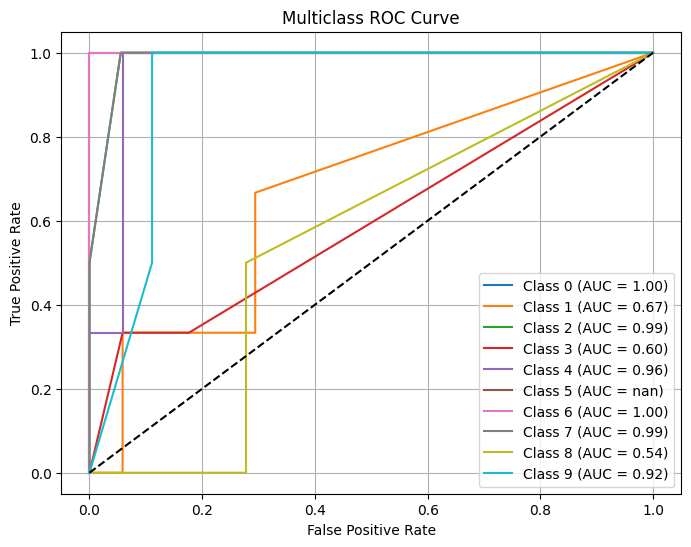

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




Test size 30


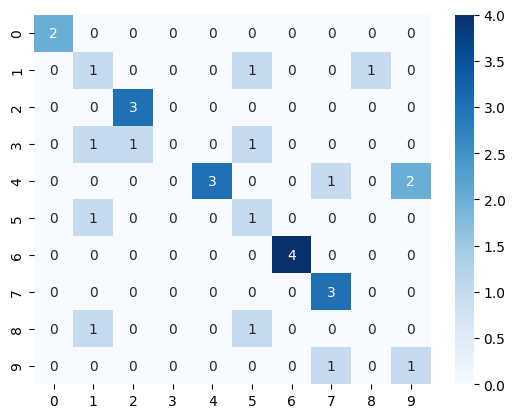

accuracy_score 0.6
precision_score 0.5183333333333333
recall_score 0.5833333333333333
f1_score 0.5292857142857142


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


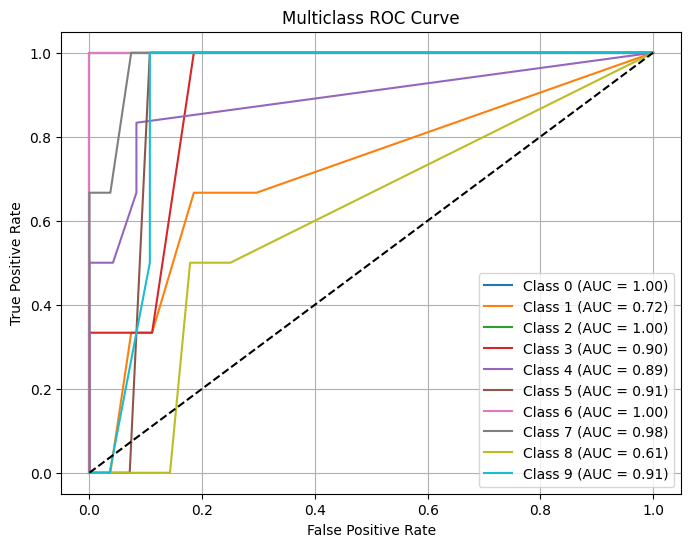

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




Test size 40


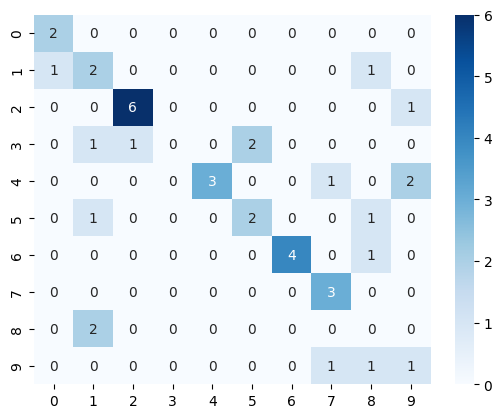

accuracy_score 0.575
precision_score 0.5207142857142857
recall_score 0.549047619047619
f1_score 0.5148412698412698


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


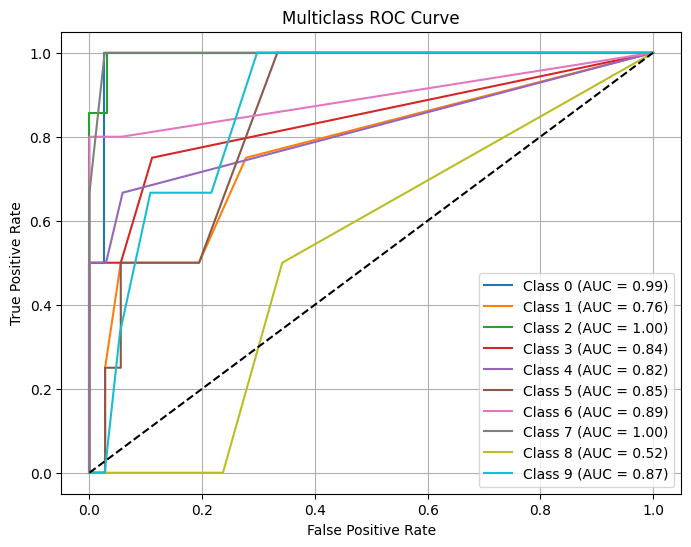

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




Test size 50


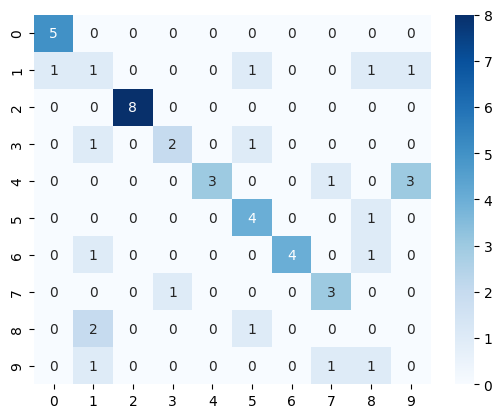

accuracy_score 0.6
precision_score 0.5838095238095239
recall_score 0.5345238095238095
f1_score 0.5395670995670996


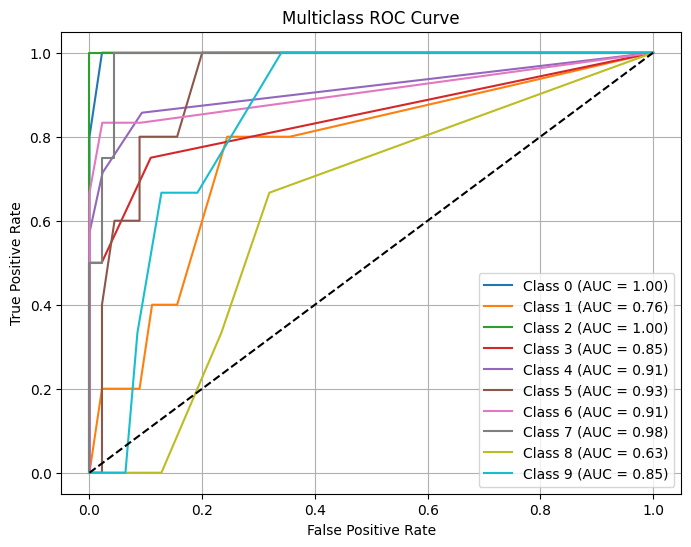

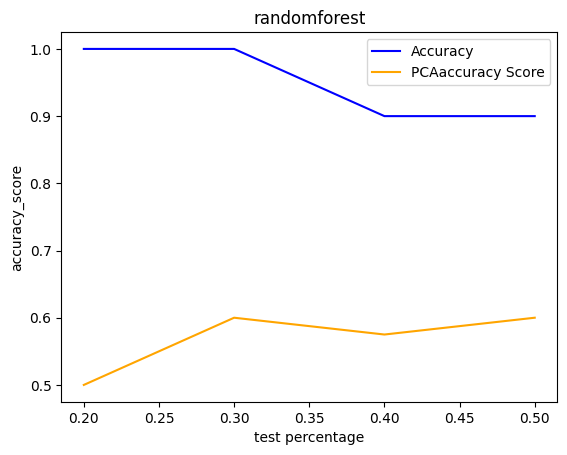

In [ ]:
testsize=[];
arr_score=[];
for i in range (2,6):
  solverandomforestpca(i*10,X,y,testsize,arr_score)#criterion=entropy
plt.plot(testsize, acc_score, label="Accuracy", color="blue")
plt.plot(testsize, arr_score, label="PCAaccuracy Score", color="orange")
plt.title('randomforest');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');
plt.legend()

In [ ]:
def solvemlpclassifier(testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  classifier=MLPClassifier(learning_rate='constant',max_iter=35,momentum=0.9);
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 20


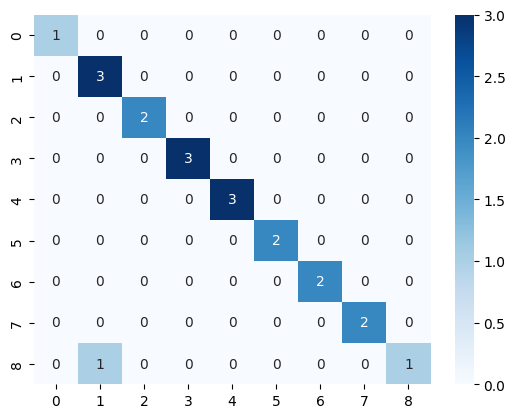

accuracy_score 0.95
precision_score 0.9722222222222222
recall_score 0.9444444444444444
f1_score 0.9470899470899471


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


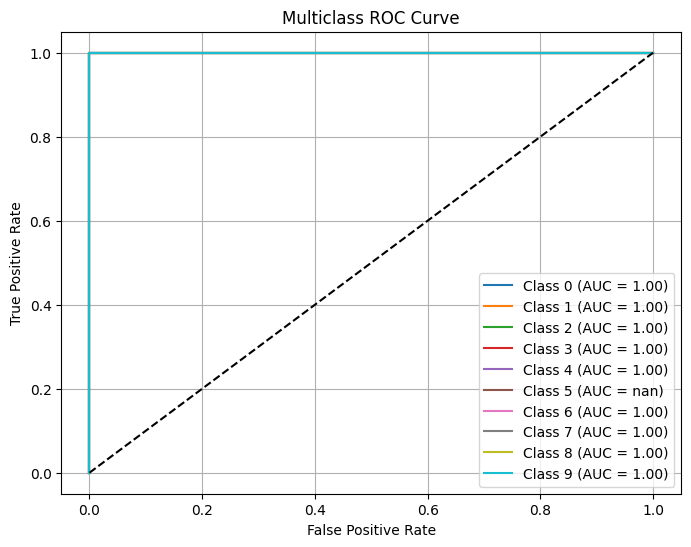

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 30


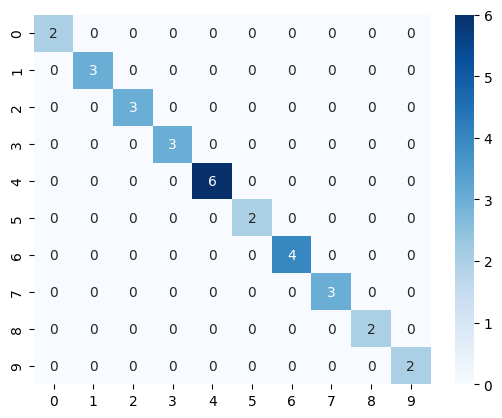

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


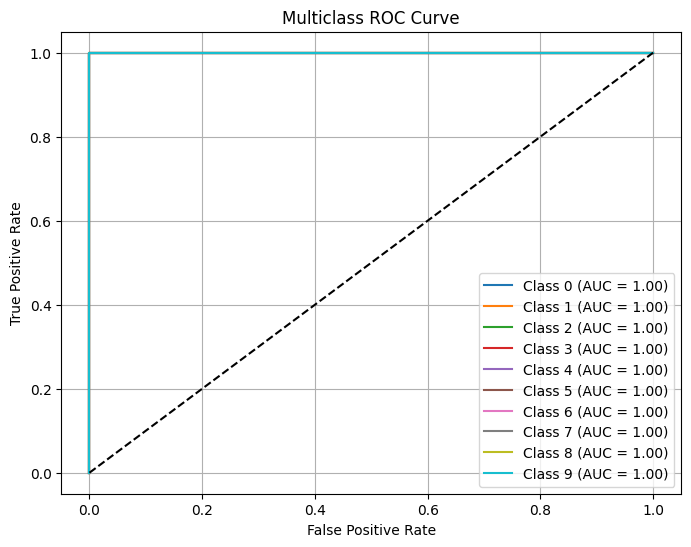

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 40


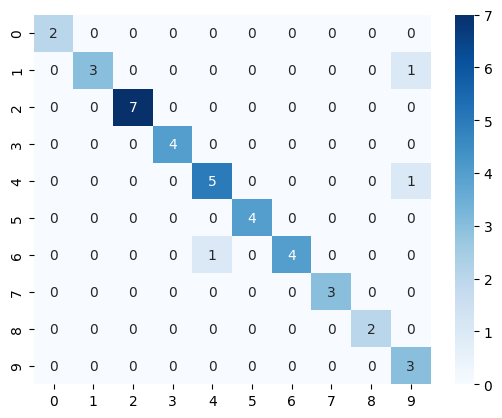

accuracy_score 0.925
precision_score 0.9433333333333334
recall_score 0.9383333333333332
f1_score 0.932936507936508


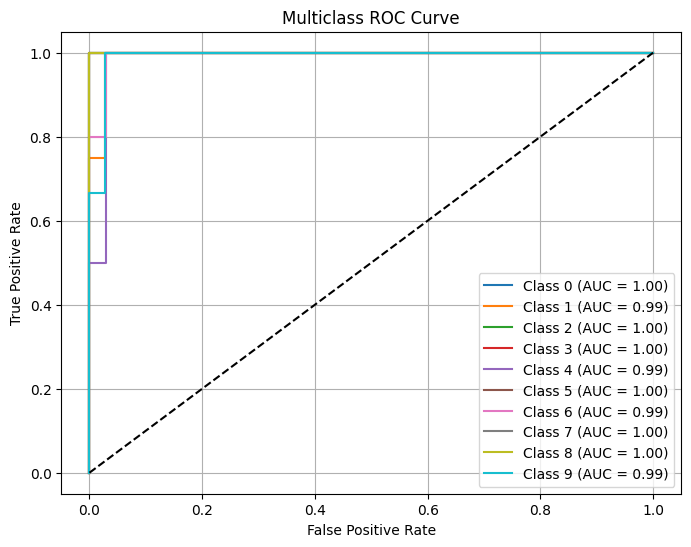

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 50


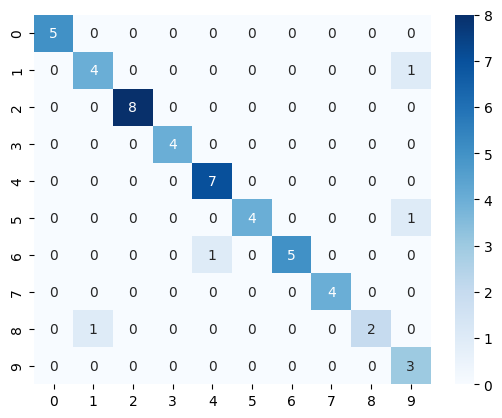

accuracy_score 0.92
precision_score 0.9275
recall_score 0.9099999999999999
f1_score 0.9081313131313131


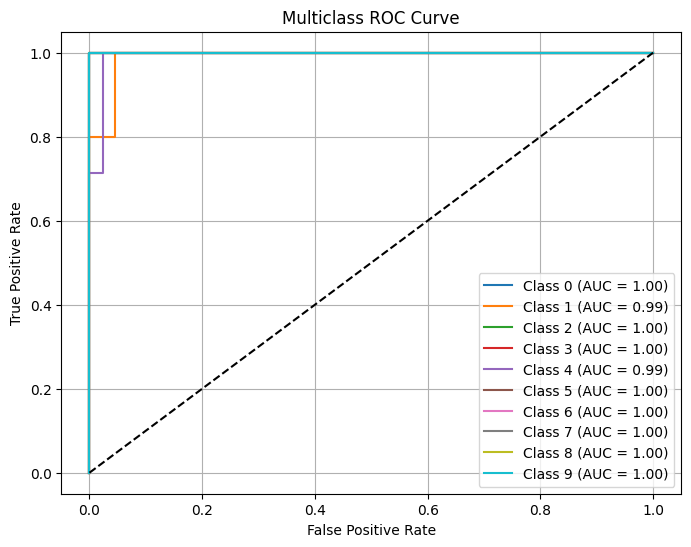

Text(0, 0.5, 'accuracy_score')

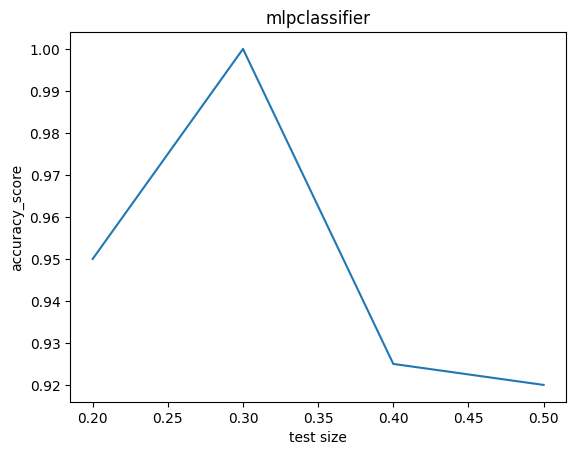

In [ ]:
testsize=[];
acc_score=[];
for i in range (2,6):
  solvemlpclassifier(i*10,X,y,testsize,acc_score);
plt.plot(testsize,acc_score);
plt.title('mlpclassifier');
plt.xlabel('test size');
plt.ylabel('accuracy_score')

In [ ]:
def solvemlpclassifierpca(testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  pca = PCA(n_components = 2)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  classifier=MLPClassifier(learning_rate='constant',max_iter=35,momentum=0.9);
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 20


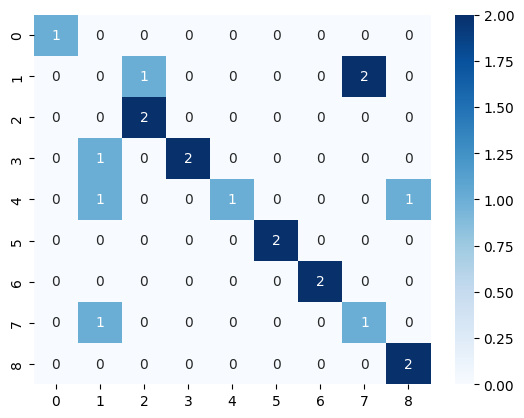

accuracy_score 0.65
precision_score 0.7407407407407408
recall_score 0.7222222222222222
f1_score 0.7


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


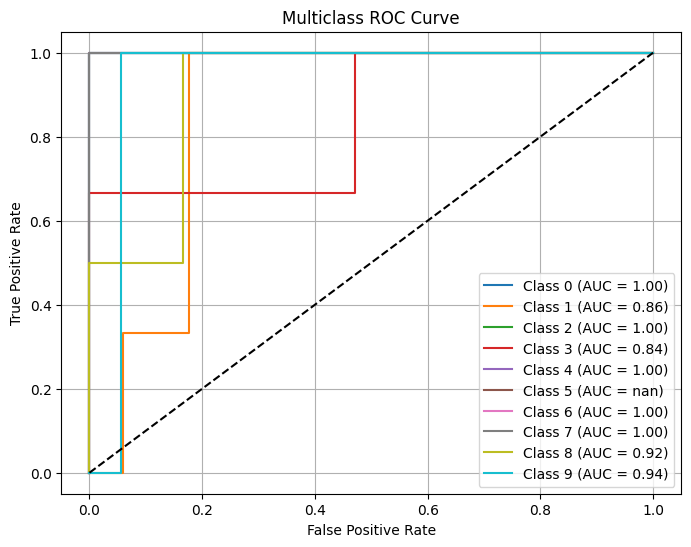

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 30


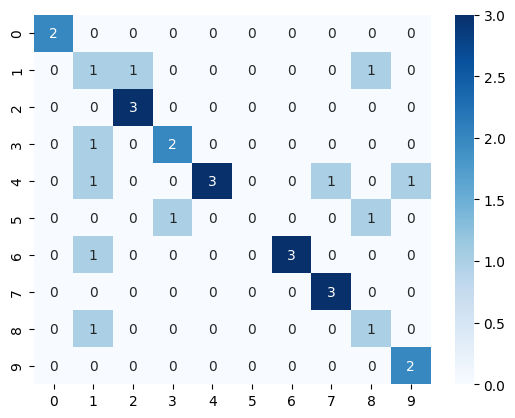

accuracy_score 0.6666666666666666
precision_score 0.6366666666666666
recall_score 0.675
f1_score 0.6354761904761905


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


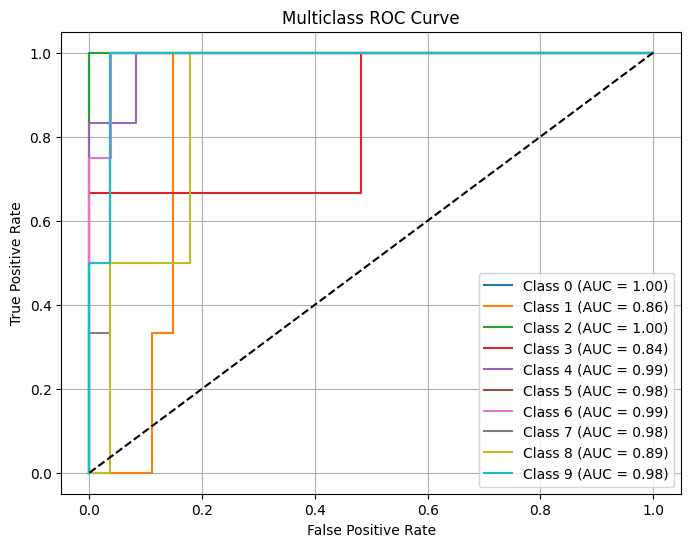

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 40


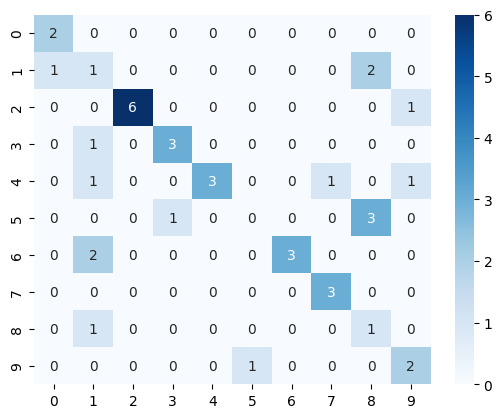

accuracy_score 0.6
precision_score 0.6
recall_score 0.6123809523809525
f1_score 0.5768315018315018


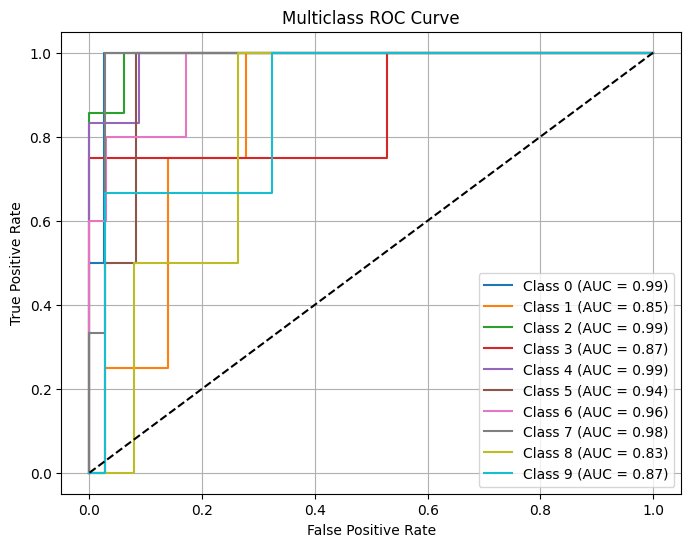

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 50


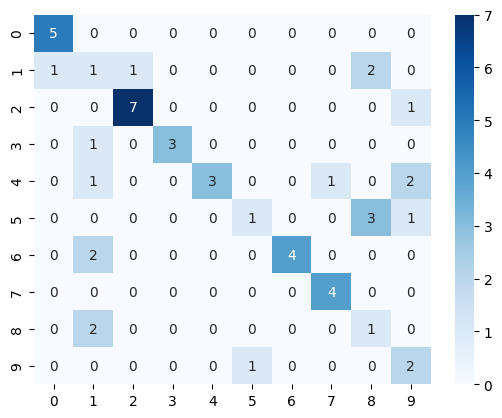

accuracy_score 0.62
precision_score 0.6651190476190476
recall_score 0.6120238095238095
f1_score 0.6049170274170275


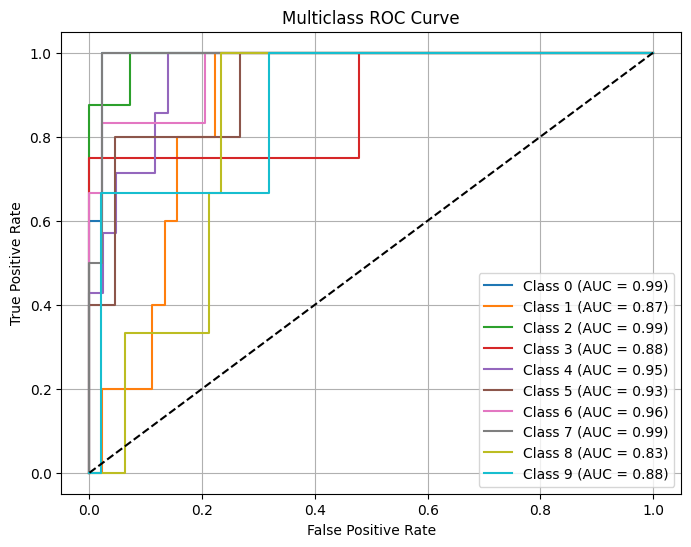

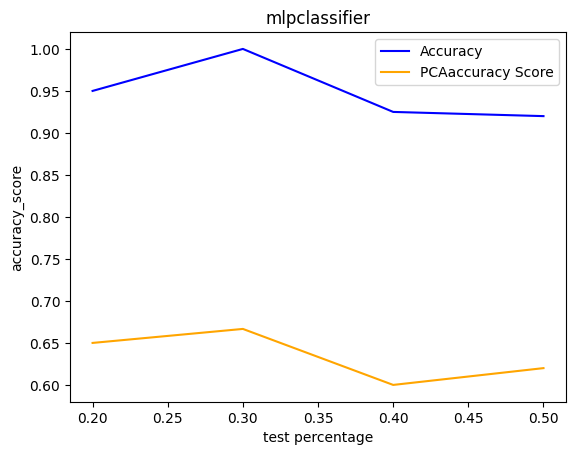

In [ ]:
testsize=[];
arr_score=[];
for i in range (2,6):
  solvemlpclassifierpca(i*10,X,y,testsize,arr_score);
plt.plot(testsize, acc_score, label="Accuracy", color="blue")
plt.plot(testsize, arr_score, label="PCAaccuracy Score", color="orange")
plt.title('mlpclassifier');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');
plt.legend()